In [1]:
import numpy as np
import shutil
import os
import random
import glob
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
from keras.layers import Dropout,MaxPooling2D

In [3]:
os.chdir("F:\Courses\\dogs and Cats\\train")

In [4]:
if os.path.isdir("train\\cats") is False:
    os.makedirs("train\\cats")
    os.makedirs("train\\dogs")
    os.makedirs("valid\\cats")
    os.makedirs("valid\\dogs")
    os.makedirs("test\\cats")
    os.makedirs("test\\dogs")
    
    for c in random.sample(glob.glob("cat*"),500):
        shutil.move(c, "train\\cats")
    for c in random.sample(glob.glob("dog*"),500):
        shutil.move(c, "train\\dogs")
    for c in random.sample(glob.glob("cat*"),100):
        shutil.move(c, "valid\\cats")
    for c in random.sample(glob.glob("dog*"),100):
        shutil.move(c, "valid\\dogs")
    for c in random.sample(glob.glob("cat*"),100):
        shutil.move(c, "test\\cats")
    for c in random.sample(glob.glob("dog*"),100):
        shutil.move(c, "test\\dogs")

In [5]:
#paths 
train_path = os.path.join(os.getcwd(), "train")
test_path = os.path.join(os.getcwd(), "test")
valid_path = os.path.join(os.getcwd(), 'valid')

In [6]:
train_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.vgg16.preprocess_input)\
                .flow_from_directory(directory= train_path, target_size= (224, 224), classes= [ "dogs", "cats"]) 

Found 1000 images belonging to 2 classes.


In [7]:
valid_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.vgg16.preprocess_input)\
                .flow_from_directory(directory= valid_path, target_size= (224, 224), classes= [ "dogs", "cats"]) 

Found 200 images belonging to 2 classes.


In [8]:
test_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.vgg16.preprocess_input)\
                .flow_from_directory(directory= test_path, target_size= (224, 224), classes= [ "dogs", "cats"], shuffle= False) 

Found 200 images belonging to 2 classes.


In [9]:
img, label = next(train_batches)

In [10]:
def plotImages(image_arr):
    fig, axes = plt.subplots(4, 8, figsize = (20, 20))
    axes = axes.flatten()
    for img, ax in zip(image_arr, axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

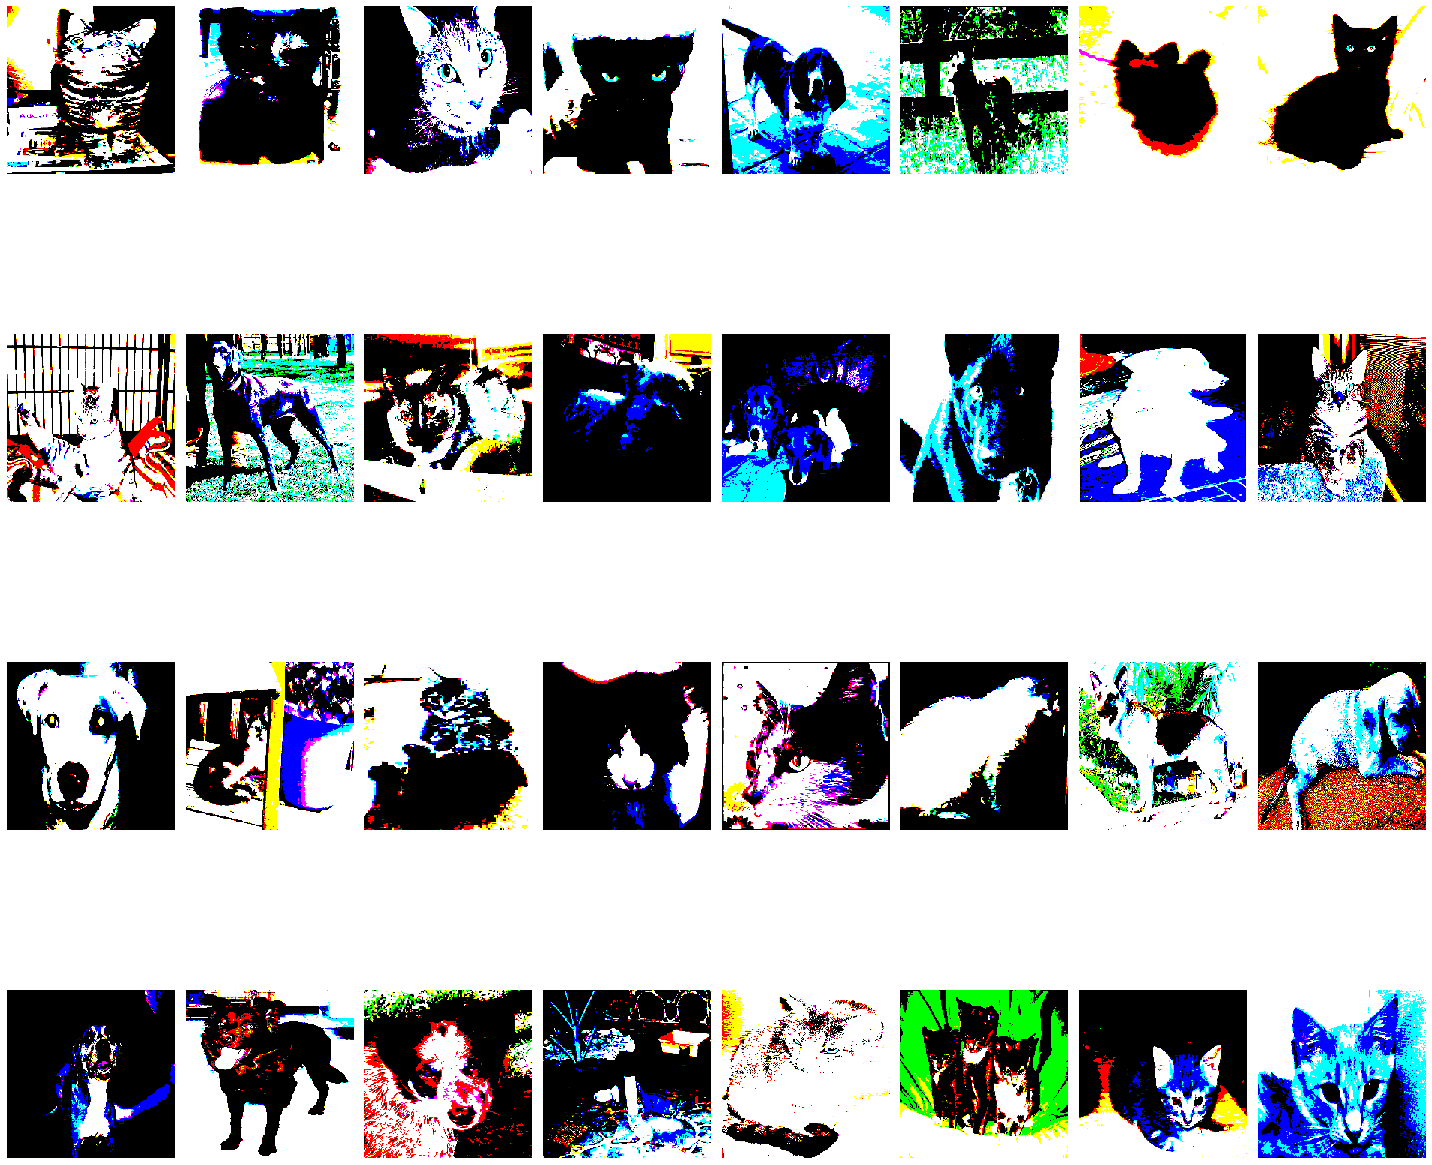

In [11]:
plotImages(img)

## Working with vgg16 model

In [12]:
vgg16_model = keras.applications.vgg16.VGG16()

In [13]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [16]:
for layer in model.layers:
    layer.trainable = False

In [17]:
model.add(Dense(2, activation = "softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

## Using Mobilenet model

In [12]:
mbnet = keras.applications.mobilenet.MobileNet()

In [13]:
mbnet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [19]:
opt = Adam(lr = 0.001)
model.compile(optimizer= opt, loss = categorical_crossentropy, metrics = ["accuracy"])

In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("model", monitor='val_accuracy', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience= 3, verbose=1, mode='auto')
model.fit(x= train_batches, steps_per_epoch = len(train_batches), validation_data= valid_batches, 
          validation_steps = len(valid_batches), epochs= 10, callbacks= [checkpoint, early])

Epoch 1/15
32/32 [==============================] - 479s 15s/step - loss: 0.1815 - accuracy: 0.9270 - val_loss: 0.1217 - val_accuracy: 0.9700
Epoch 2/15
32/32 [==============================] - 390s 12s/step - loss: 0.0598 - accuracy: 0.9810 - val_loss: 0.1328 - val_accuracy: 0.9500
Epoch 3/15
32/32 [==============================] - 434s 14s/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.1516 - val_accuracy: 0.9550
Epoch 4/15
32/32 [==============================] - 415s 13s/step - loss: 0.0060 - accuracy: 0.9990 - val_loss: 0.1365 - val_accuracy: 0.9650
Epoch 5/15
32/32 [==============================] - 463s 14s/step - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.1538 - val_accuracy: 0.9600
Epoch 6/15
32/32 [==============================] - 429s 13s/step - loss: 0.0044 - accuracy: 0.9980 - val_loss: 0.1552 - val_accuracy: 0.9600
Epoch 7/15
32/32 [==============================] - 428s 13s/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1437 - val_accuracy: 0.9600
Epoch 

In [21]:
predictions = model.predict(test_batches, steps= len(test_batches))

In [22]:
img, labels = next(test_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

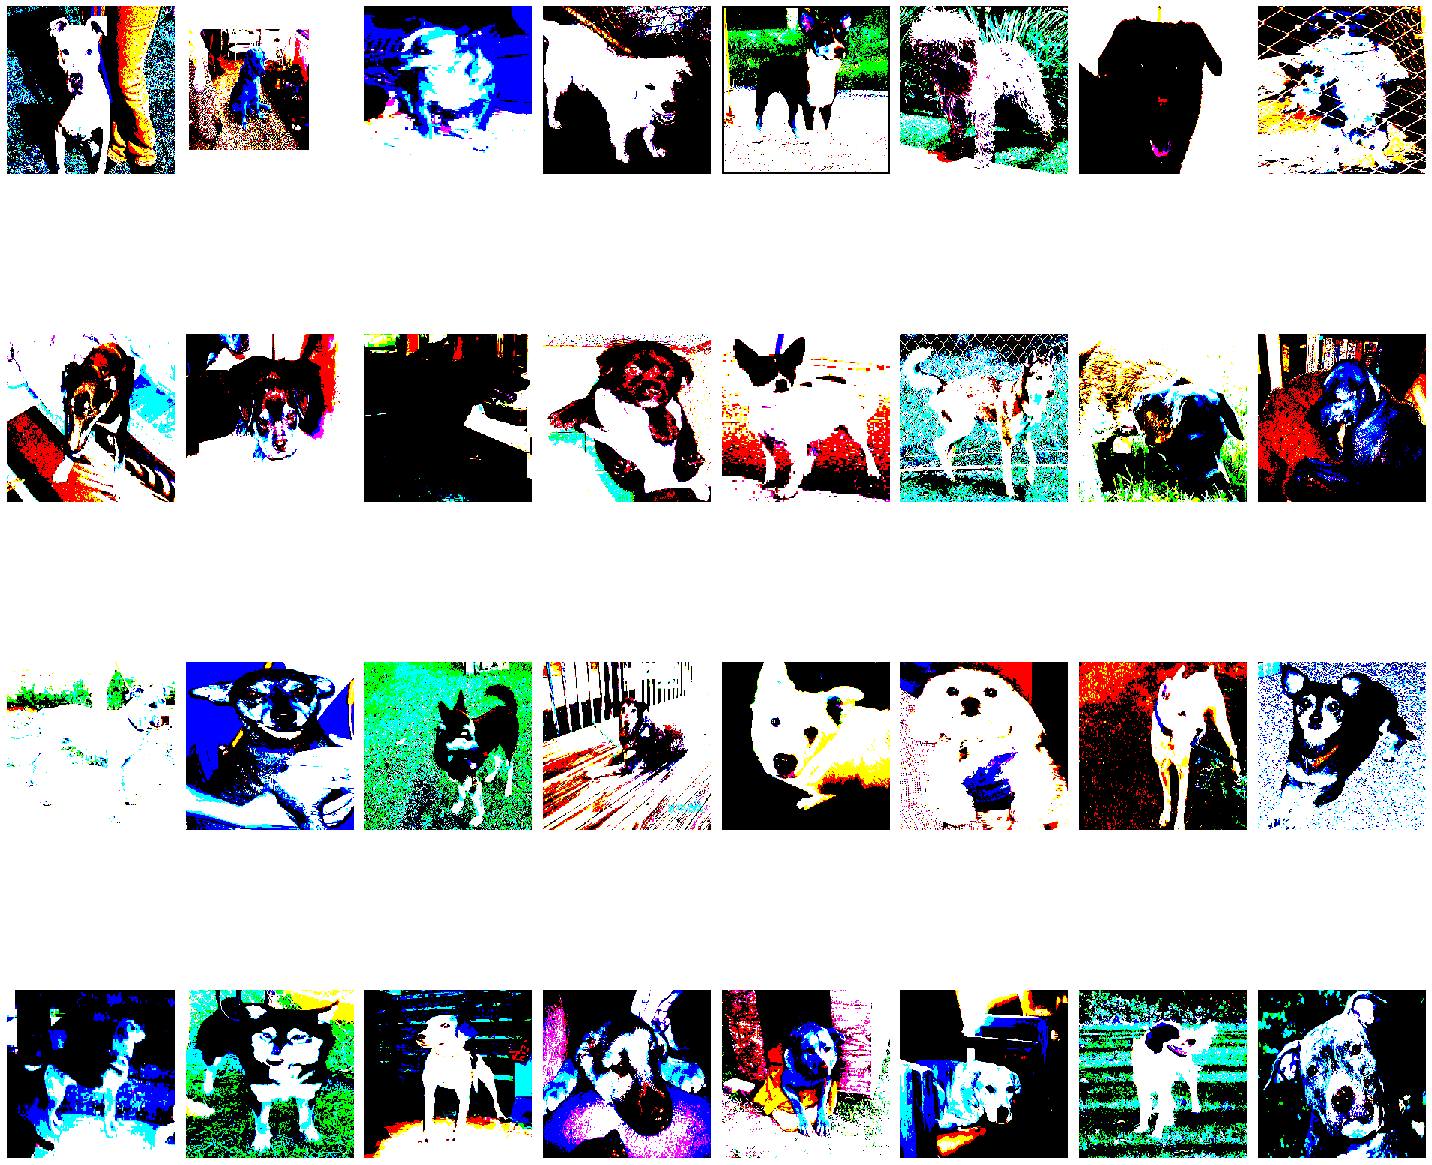

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [23]:
plotImages(img)
print(labels)

In [24]:
cm = confusion_matrix(y_true= test_batches.classes, y_pred=np.argmax(predictions, axis = -1))

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[100   0]
 [  1  99]]


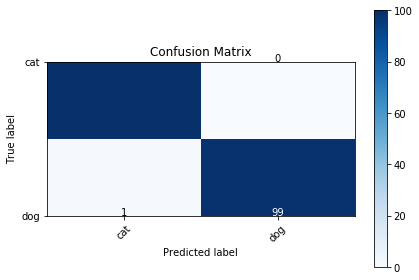

In [27]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [28]:
train_batches.class_indices

{'dogs': 0, 'cats': 1}

In [40]:
def detect_pic(path):
    from keras.preprocessing import image
    img = image.load_img(path, target_size=(224, 224))
    img = np.asarray(img)
    plt.imshow(img)
    img = np.expand_dims(img, axis = 0)
    
    output = model.predict(img)
    output = np.round(output)
    if output[0][0] == 1:
        print("DOG")
    else:
        print("CAT")

In [66]:
path = os.path.join(os.getcwd(), "New folder\\cat.01.jpg")

CAT


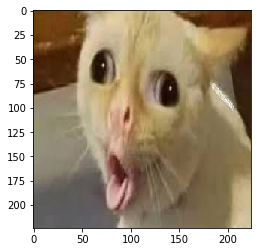

In [67]:
detect_pic(path)